In [106]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.animation as manim
from skimage.measure import find_contours
import pylidc as pyl
from pylidc.utils import consensus
import SimpleITK as sitk
from radiomics import featureextractor

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

from sklearn.ensemble import StackingClassifier
from sklearn.decomposition import PCA


In [107]:
#para percorrer todos os pacientes no banco de dados PyLIDC

subtlety=[]
internalStructure=[]
calcification=[]
sphericity=[]
margin=[]
lobulation=[]
spiculation=[]
texture=[]
malignancy=[]
nodulo_id=[]

nod_id=-1

for scan in pyl.query(pyl.Scan):
    
    nods = scan.cluster_annotations()
    
    if nods:
        for nod in nods:
            nod_id+=1
            
            anns_subtlety=0
            anns_Structure=0
            anns_calcification=0
            anns_sphericity=0
            anns_margin=0
            anns_lobulation=0
            anns_spiculation=0
            anns_texture=0
            anns_malignancy=0
            
            for anns in nod:
                anns_subtlety+=anns.subtlety
                anns_Structure+=anns.internalStructure
                anns_calcification+=anns.calcification
                anns_sphericity+=anns.sphericity
                anns_margin+=anns.margin
                anns_lobulation+=anns.lobulation
                anns_spiculation+=anns.spiculation
                anns_texture+=anns.texture
                anns_malignancy+=anns.malignancy
            
            
            num_ann=len(nod) 
            subtlety.append(anns_subtlety/num_ann)
            internalStructure.append(anns_Structure/num_ann)
            calcification.append(anns_calcification/num_ann)
            sphericity.append(anns_sphericity/num_ann)
            margin.append(anns_margin/num_ann)
            lobulation.append(anns_lobulation/num_ann)
            spiculation.append(anns_spiculation/num_ann)
            texture.append(anns_texture/num_ann)
            malignancy.append(anns_malignancy/num_ann)
            nodulo_id.append(nod_id)
        
    else:
        pass
        

        
#criar o DataFrame
data={'Nodulo_id':nodulo_id,'Sutlety':subtlety,'Internal_Structure':internalStructure,'Calcification':calcification,'Sphericity':sphericity,'Margin':margin,'Lobulation':lobulation,'Spiculation':spiculation,'Texture':texture,'Malignancy':malignancy}
df=pd.DataFrame(data)
            
            
        
        
        
        
    

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some n

In [108]:
df

,Nodulo_id,Sutlety,Internal_Structure,Calcification,Sphericity,Margin,Lobulation,Spiculation,Texture,Malignancy
0,0,4.500000,1.0,6.0,4.000000,3.250000,2.250000,2.25,4.750000,3.75
1,1,4.750000,1.0,6.0,4.000000,2.750000,3.000000,2.25,4.500000,3.75
2,2,4.000000,1.0,5.0,5.000000,5.000000,1.000000,1.00,5.000000,1.00
3,3,5.000000,1.0,5.0,3.750000,3.250000,3.250000,2.75,4.750000,4.25
4,4,2.500000,1.0,6.0,4.500000,4.250000,4.000000,4.00,4.750000,3.25
...,...,...,...,...,...,...,...,...,...,...
2646,2646,4.333333,1.0,6.0,3.666667,2.333333,2.333333,3.00,3.333333,4.00
2647,2647,2.500000,1.0,6.0,4.500000,2.000000,1.000000,1.50,1.000000,3.50
2648,2648,3.000000,1.0,6.0,3.500000,3.500000,1.500000,1.00,5.000000,3.50
2649,2649,5.000000,1.0,6.0,4.000000,5.000000,1.000000,1.00,5.000000,2.00


In [109]:
conditions = [
    (df['Malignancy'] >= 3.5),
    (df['Malignancy'] < 2.5),
    (df['Malignancy'] >= 2.5) & (df['Malignancy'] < 3.5)
]

choices = ['Yes', 'No', 'Indeterminate']

df['Target'] = np.select(conditions, choices, default='')
df

,Nodulo_id,Sutlety,Internal_Structure,Calcification,Sphericity,Margin,Lobulation,Spiculation,Texture,Malignancy,Target
0,0,4.500000,1.0,6.0,4.000000,3.250000,2.250000,2.25,4.750000,3.75,Yes
1,1,4.750000,1.0,6.0,4.000000,2.750000,3.000000,2.25,4.500000,3.75,Yes
2,2,4.000000,1.0,5.0,5.000000,5.000000,1.000000,1.00,5.000000,1.00,No
3,3,5.000000,1.0,5.0,3.750000,3.250000,3.250000,2.75,4.750000,4.25,Yes
4,4,2.500000,1.0,6.0,4.500000,4.250000,4.000000,4.00,4.750000,3.25,Indeterminate
...,...,...,...,...,...,...,...,...,...,...,...
2646,2646,4.333333,1.0,6.0,3.666667,2.333333,2.333333,3.00,3.333333,4.00,Yes
2647,2647,2.500000,1.0,6.0,4.500000,2.000000,1.000000,1.50,1.000000,3.50,Yes
2648,2648,3.000000,1.0,6.0,3.500000,3.500000,1.500000,1.00,5.000000,3.50,Yes
2649,2649,5.000000,1.0,6.0,4.000000,5.000000,1.000000,1.00,5.000000,2.00,No


In [110]:
import pylidc as pl
# configura o extrator de características do PyRadiomics sem o arquivo params.yaml
extractor = featureextractor.RadiomicsFeatureExtractor()

scans_with_annotations = pl.query(pl.Scan).filter(pl.Scan.annotations.any()).all()

# lista para armazenar as características
features_list = []
patient_ids = []

# variável para criar ids dos nódulos
nodule_id_counter = 0

for scan in scans_with_annotations:
    patient_id = scan.patient_id
   
    # separacao de nodulos
    nods = scan.cluster_annotations()
    for anns in nods:
        # Realize a consolidação de consenso e nível de acordo de 50%
        cmask, cbbox, masks = consensus(anns, clevel=0.5, pad=[(20, 20), (20, 20), (0, 0)])
       
        # converter a matriz de pixels para uma imagem
        image = sitk.GetImageFromArray(cmask.astype(float))
       
        # extrair características usando pyradiomics
        features = extractor.execute(image, image, label=1) 
        patient_ids.append(patient_id)
        features['Nodulo_id'] = nodule_id_counter
        nodule_id_counter += 1
       
        features_list.append(features)

features_df = pd.DataFrame(features_list)

# selecionar apenas as características desejadas
#podemos eliminar?
selected_features = features_df[['Nodulo_id',
                                 'original_shape_Elongation',
                                 'original_shape_Sphericity',
                                 'original_shape_VoxelVolume',
                                 'original_shape_SurfaceArea',
                                 'original_shape_Maximum2DDiameterSlice',
                                 'original_firstorder_Entropy',
                                 'original_firstorder_Energy',
                                 'original_glrlm_LongRunEmphasis',
                                 'original_glrlm_ShortRunEmphasis']]

# Salvar as características selecionadas em um arquivo CSV
selected_features.to_csv('selected_radiomics_features3.csv', index=False)

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

In [111]:
features = pd.read_csv('selected_radiomics_features3.csv') #eliminar?

In [112]:
features #eliminar?

,Nodulo_id,original_shape_Elongation,original_shape_Sphericity,original_shape_VoxelVolume,original_shape_SurfaceArea,original_shape_Maximum2DDiameterSlice,original_firstorder_Entropy,original_firstorder_Energy,original_glrlm_LongRunEmphasis,original_glrlm_ShortRunEmphasis
0,0,0.848594,0.546513,1903.0,1345.323632,26.000000,-3.203427e-16,1903.0,65.445460,0.244577
1,1,0.845360,0.560402,1741.0,1237.565131,23.021729,-3.203427e-16,1741.0,66.218881,0.213370
2,2,0.879310,0.721639,34.0,63.678640,5.099020,-3.203427e-16,34.0,5.249011,0.595154
3,3,0.956858,0.547252,3646.0,2079.849951,35.227830,-3.203427e-16,3646.0,102.968159,0.163406
4,4,0.779886,0.660676,521.0,465.127969,12.041595,-3.203427e-16,521.0,21.648012,0.288292
...,...,...,...,...,...,...,...,...,...,...
2646,2646,0.793847,0.664923,325.0,335.340372,13.928388,-3.203427e-16,325.0,14.993576,0.330916
2647,2647,0.754255,0.697558,623.0,496.211173,12.649111,-3.203427e-16,623.0,23.229054,0.269619
2648,2648,0.564212,0.597379,189.0,255.721774,12.165525,-3.203427e-16,189.0,14.322702,0.391300
2649,2649,0.453474,0.708770,77.0,115.935513,7.615773,-3.203427e-16,77.0,6.640585,0.419657


In [113]:
df['Nodulo_id']=df['Nodulo_id'].astype(int)

df = pd.merge(df, features_df, on='Nodulo_id')
df

,Nodulo_id,Sutlety,Internal_Structure,Calcification,Sphericity,Margin,Lobulation,Spiculation,Texture,Malignancy,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0,4.500000,1.0,6.0,4.000000,3.250000,2.250000,2.25,4.750000,3.75,...,2.7613561461850897e-07,2.7613561461850897e-07,-3.203426503814917e-16,0.0005254860746190226,0.0,0.0,1000000.0,0.0,0.0,0.0
1,1,4.750000,1.0,6.0,4.000000,2.750000,3.000000,2.25,4.500000,3.75,...,3.299153008448141e-07,3.299153008448141e-07,-3.203426503814917e-16,0.0005743825387708214,0.0,0.0,1000000.0,0.0,0.0,0.0
2,2,4.000000,1.0,5.0,5.000000,5.000000,1.000000,1.00,5.000000,1.00,...,0.0008650519031141869,0.0008650519031141869,-3.203426503814917e-16,0.029411764705882353,0.0,0.0,1000000.0,0.0,0.0,0.0
3,3,5.000000,1.0,5.0,3.750000,3.250000,3.250000,2.75,4.750000,4.25,...,0.6666666917694576,0.6666666917694576,0.9182958340544889,0.0008228195282501371,2949210.888888889,0.0,1000000.0,0.0,0.0,0.0
4,4,2.500000,1.0,6.0,4.500000,4.250000,4.000000,4.00,4.750000,3.25,...,3.6840418359790892e-06,3.6840418359790892e-06,-3.203426503814917e-16,0.0019193857965451055,0.0,0.0,1000000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,2646,4.333333,1.0,6.0,3.666667,2.333333,2.333333,3.00,3.333333,4.00,...,9.467455621301774e-06,9.467455621301774e-06,-3.203426503814917e-16,0.003076923076923077,0.0,0.0,1000000.0,0.0,0.0,0.0
2647,2647,2.500000,1.0,6.0,4.500000,2.000000,1.000000,1.50,1.000000,3.50,...,2.5764629800916708e-06,2.5764629800916708e-06,-3.203426503814917e-16,0.0016051364365971107,0.0,0.0,1000000.0,0.0,0.0,0.0
2648,2648,3.000000,1.0,6.0,3.500000,3.500000,1.500000,1.00,5.000000,3.50,...,2.7994736989445986e-05,2.7994736989445986e-05,-3.203426503814917e-16,0.005291005291005291,0.0,0.0,1000000.0,0.0,0.0,0.0
2649,2649,5.000000,1.0,6.0,4.000000,5.000000,1.000000,1.00,5.000000,2.00,...,0.00016866250632484398,0.00016866250632484398,-3.203426503814917e-16,0.012987012987012988,0.0,0.0,1000000.0,0.0,0.0,0.0


## Metodo Random Forrest - Extração de Features 

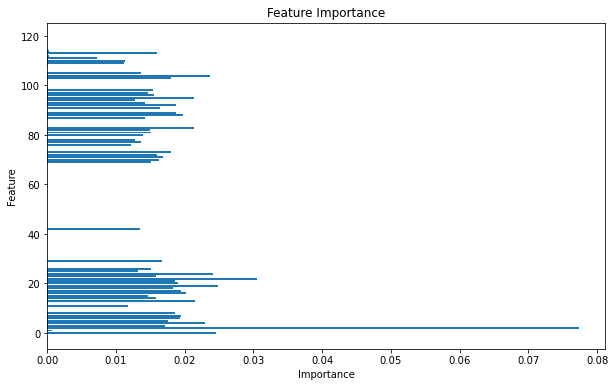

In [114]:

X_original = df.drop(['Target', 'Malignancy', 'Nodulo_id'], axis=1)
X = X_original.select_dtypes(include=['number', 'object'])
y = df['Target']  # Target

for column in X.columns:
    if X[column].dtype == 'object':
        try:
            X[column] = pd.to_numeric(X[column], errors='coerce')
        except (ValueError, TypeError):
            # caso haja erro na conversão
            # ex: converter para NaN
            X[column] = X[column].apply(pd.to_numeric, errors='coerce')

imputer = SimpleImputer(strategy='mean')#o que é?
X = imputer.fit_transform(X)
#recuperar
column_names = X_original.select_dtypes(include=['number', 'object']).columns

X = pd.DataFrame(X)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# importâncias das features
feature_importances = rf_model.feature_importances_

# dataset com as importâncias e nomes das features
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# odenar as features pela importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# gráfico de barras das importâncias das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [115]:
feature_importance_df['Feature'] = column_names[feature_importance_df['Feature']]

print(feature_importance_df)

                                       Feature  Importance
2                                Calcification    0.077335
22              diagnostics_Mask-original_Hash    0.030481
19             diagnostics_Image-original_Mean    0.024808
0                                      Sutlety    0.024611
24              diagnostics_Mask-original_Size    0.024047
..                                         ...         ...
53                  original_firstorder_Median    0.000000
52                    original_firstorder_Mean    0.000000
51   original_firstorder_MeanAbsoluteDeviation    0.000000
50                 original_firstorder_Maximum    0.000000
119   original_glszm_HighGrayLevelZoneEmphasis    0.000000

[120 rows x 2 columns]


In [116]:
feature_importance_df.to_csv('feature_importance.csv', index=False)
feature_importance2 = pd.read_csv('feature_importance.csv')
feature_importance2

,Feature,Importance
0,Calcification,0.077335
1,diagnostics_Mask-original_Hash,0.030481
2,diagnostics_Image-original_Mean,0.024808
3,Sutlety,0.024611
4,diagnostics_Mask-original_Size,0.024047
...,...,...
115,original_firstorder_Median,0.000000
116,original_firstorder_Mean,0.000000
117,original_firstorder_MeanAbsoluteDeviation,0.000000
118,original_firstorder_Maximum,0.000000


In [117]:
feature_importance=feature_importance2
feature_importance

,Feature,Importance
0,Calcification,0.077335
1,diagnostics_Mask-original_Hash,0.030481
2,diagnostics_Image-original_Mean,0.024808
3,Sutlety,0.024611
4,diagnostics_Mask-original_Size,0.024047
...,...,...
115,original_firstorder_Median,0.000000
116,original_firstorder_Mean,0.000000
117,original_firstorder_MeanAbsoluteDeviation,0.000000
118,original_firstorder_Maximum,0.000000


In [118]:
available_columns = df.columns

# lista de nomes das features importantes
selected_columns = feature_importance['Feature'].tolist()

# selecionar apenas as colunas que existem em ambos os datasets
common_columns = list(set(available_columns).intersection(selected_columns))
df_selected = df[common_columns]
df_selected

,original_firstorder_Skewness,original_glcm_SumSquares,original_glrlm_ShortRunLowGrayLevelEmphasis,diagnostics_Image-original_Mean,original_glrlm_RunLengthNonUniformity,original_glcm_SumEntropy,original_firstorder_RootMeanSquared,original_gldm_SmallDependenceLowGrayLevelEmphasis,Calcification,original_glcm_ClusterProminence,...,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_DependenceNonUniformity,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_GrayLevelVariance,original_glcm_Id,original_glszm_HighGrayLevelZoneEmphasis,diagnostics_Image-original_Dimensionality,diagnostics_Mask-original_CenterOfMass,original_firstorder_Minimum
0,0.0,0.0,0.24457682074388723,0.051024,81.96353642257648,-3.2034265038149176e-16,1.0,0.003966229640730327,6.0,0.0,...,471.29427220178667,471.29427220178667,341.99527062532843,1.0,0.0,1.0,1.0,3D,"(2.606936416184971, 45.86600105097215, 38.7924...",1.0
1,0.0,0.0,0.21336963051510605,0.054136,79.67868574660454,-3.2034265038149176e-16,1.0,0.0034748100657505726,6.0,0.0,...,467.097645031591,467.097645031591,300.39804709936817,1.0,0.0,1.0,1.0,3D,"(2.090178058587019, 31.88684663986215, 43.5117...",1.0
2,0.0,0.0,0.5951535710192319,0.007535,11.853707050391401,-3.2034265038149176e-16,1.0,0.014499807398422264,5.0,0.0,...,126.23529411764706,126.23529411764706,3.0,1.0,0.0,1.0,1.0,3D,"(0.2647058823529412, 23.323529411764707, 23.67...",1.0
3,0.0,0.0,0.16340576642715482,0.063299,94.35827417946201,-3.2034265038149176e-16,1.0,0.0034197081669628073,5.0,0.0,...,515.9199122325837,515.9199122325837,790.5101481075151,1.0,0.0,1.0,1.0,3D,"(3.593801426220516, 37.13055403181569, 44.0181...",1.0
4,0.0,0.0,0.28829180137284266,0.014866,28.421955142596662,-3.2034265038149176e-16,1.0,0.004077078166043691,6.0,0.0,...,411.2226487523992,411.2226487523992,40.865642994241846,1.0,0.0,1.0,1.0,3D,"(4.113243761996161, 30.23608445297505, 29.5854...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,0.0,0.0,0.3309163747257618,0.010188,25.595885339168742,-3.2034265038149176e-16,1.0,0.004565973328360816,6.0,0.0,...,366.23692307692306,366.23692307692306,17.443076923076923,1.0,0.0,1.0,1.0,3D,"(5.9107692307692306, 28.12923076923077, 27.815...",1.0
2647,0.0,0.0,0.2696187887658525,0.019069,26.463078773418243,-3.2034265038149176e-16,1.0,0.003686721134385309,6.0,0.0,...,447.3402889245586,447.3402889245586,55.43338683788122,1.0,0.0,1.0,1.0,3D,"(5.425361155698234, 25.696629213483146, 27.226...",1.0
2648,0.0,0.0,0.3912999387785995,0.020854,30.5472109015337,-3.2034265038149176e-16,1.0,0.006902070965462305,6.0,0.0,...,258.5238095238095,258.5238095238095,17.761904761904763,1.0,0.0,1.0,1.0,3D,"(0.7883597883597884, 27.978835978835978, 25.87...",1.0
2649,0.0,0.0,0.41965737183795937,0.007404,15.574499134059993,-3.2034265038149176e-16,1.0,0.006869291506347144,6.0,0.0,...,218.63636363636363,218.63636363636363,6.116883116883117,1.0,0.0,1.0,1.0,3D,"(1.6103896103896105, 24.662337662337663, 25.79...",1.0


In [119]:
numeric_columns = []
for col in df_selected.columns:
    try:
        df[col] = pd.to_numeric(df[col])
        numeric_columns.append(col)
    except (ValueError, TypeError):
        # remover a coluna que causou o erro
        df.drop(col, axis=1, inplace=True)

df_selected = df[numeric_columns]
df_selected


,diagnostics_Image-original_Mean,Calcification,Internal_Structure,diagnostics_Image-original_Minimum,original_shape_Elongation,original_shape_LeastAxisLength,original_shape_Flatness,diagnostics_Image-original_Maximum,Sphericity,diagnostics_Mask-original_VoxelNum,original_shape_MajorAxisLength,Lobulation,Margin,Sutlety,Texture,original_shape_MinorAxisLength,original_shape_VoxelVolume,Spiculation,diagnostics_Mask-original_VolumeNum
0,0.051024,6.0,1.0,0.0,0.848594,5.542891,0.219031,1.0,4.000000,1903,25.306411,2.250000,3.250000,4.500000,4.750000,21.474857,1903.0,2.25,1
1,0.054136,6.0,1.0,0.0,0.845360,5.209030,0.215045,1.0,4.000000,1741,24.222923,3.000000,2.750000,4.750000,4.500000,20.477091,1741.0,2.25,1
2,0.007535,5.0,1.0,0.0,0.879310,1.632763,0.289526,1.0,5.000000,34,5.639429,1.000000,5.000000,4.000000,5.000000,4.958806,34.0,1.00,1
3,0.063299,5.0,1.0,0.0,0.956858,6.435946,0.216692,1.0,3.750000,3646,29.700850,3.250000,3.250000,5.000000,4.750000,28.419506,3646.0,2.75,3
4,0.014866,6.0,1.0,0.0,0.779886,7.374952,0.595806,1.0,4.500000,521,12.378110,4.000000,4.250000,2.500000,4.750000,9.653513,521.0,4.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,0.010188,6.0,1.0,0.0,0.793847,4.534490,0.375133,1.0,3.666667,325,12.087678,2.333333,2.333333,4.333333,3.333333,9.595771,325.0,3.00,1
2647,0.019069,6.0,1.0,0.0,0.754255,8.589183,0.687954,1.0,4.500000,623,12.485120,1.000000,2.000000,2.500000,1.000000,9.416961,623.0,1.50,1
2648,0.020854,6.0,1.0,0.0,0.564212,2.586515,0.185778,1.0,3.500000,189,13.922612,1.500000,3.500000,3.000000,5.000000,7.855304,189.0,1.00,1
2649,0.007404,6.0,1.0,0.0,0.453474,2.471175,0.247844,1.0,4.000000,77,9.970706,1.000000,5.000000,5.000000,5.000000,4.521458,77.0,1.00,1


### Modelo Naive Bayes

In [120]:

X = df_selected
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_train, y_train)

y_pred = naive_bayes_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}%".format(accuracy * 100))

print(classification_report(y_test, y_pred))


Acurácia: 55.53%
               precision    recall  f1-score   support

Indeterminate       0.56      0.42      0.48       376
           No       0.51      0.75      0.61       271
          Yes       0.68      0.54      0.60       149

     accuracy                           0.56       796
    macro avg       0.59      0.57      0.56       796
 weighted avg       0.57      0.56      0.55       796



### Ensemble Stacking

In [121]:

X = df_selected
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

base_model1 = GaussianNB()
base_model2 = DecisionTreeClassifier(random_state=42)

meta_model = GaussianNB()

stacking_model = StackingClassifier(
    estimators=[('nb', base_model1), ('rf', base_model2)],
    final_estimator=meta_model
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo de Stacking: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred))


Acurácia do modelo de Stacking: 61.56%
               precision    recall  f1-score   support

Indeterminate       0.66      0.55      0.60       397
           No       0.58      0.66      0.62       258
          Yes       0.58      0.72      0.65       141

     accuracy                           0.62       796
    macro avg       0.61      0.64      0.62       796
 weighted avg       0.62      0.62      0.61       796



## Metodo PCA - Extração de Features  

In [122]:

X_original = df.drop(['Target', 'Malignancy', 'Nodulo_id'], axis=1)

# seleciona colunas numéricas
X = X_original.select_dtypes(include=['number'])

# substituir por 0 os valores null
X = X.fillna(0) 

n_components = 9 
pca = PCA(n_components=n_components)

# ajustar PCA aos dados 
X_pca = pca.fit_transform(X)

# X_pca -> características extraídas pelo PCA

components = pca.components_


In [123]:
# Exibe as características mais importantes em cada componente principal
for i, component in enumerate(components):
    print(f"Características mais importantes no Componente Principal {i + 1}:")
    feature_indices = np.argsort(np.abs(component))[::-1]
    for j in feature_indices:
        feature_name = X.columns[j]
        feature_coefficient = component[j]
        print(f"{feature_name}: {feature_coefficient}")





Características mais importantes no Componente Principal 1:
original_shape_VoxelVolume: 0.7071041988909356
diagnostics_Mask-original_VoxelNum: 0.7071041988909356
original_shape_MajorAxisLength: 0.0020690148975773754
original_shape_MinorAxisLength: 0.0014971460863133646
original_shape_LeastAxisLength: 0.0008688385074211931
Sutlety: 9.768420975190155e-05
Spiculation: 8.023508273150748e-05
Lobulation: 7.701168131001964e-05
diagnostics_Mask-original_VolumeNum: 5.685552653933796e-05
Margin: -3.328948883426781e-05
Sphericity: -1.3902116058431645e-05
Calcification: 1.1089447549367163e-05
Texture: 8.309684002981269e-06
diagnostics_Image-original_Mean: 3.5780147606723973e-06
original_shape_Flatness: 3.5689905547385393e-06
Internal_Structure: 3.0086920341182164e-06
original_shape_Elongation: -9.55809705987569e-07
diagnostics_Image-original_Maximum: 0.0
diagnostics_Image-original_Minimum: 0.0
Características mais importantes no Componente Principal 2:
original_shape_MajorAxisLength: -0.8470958830

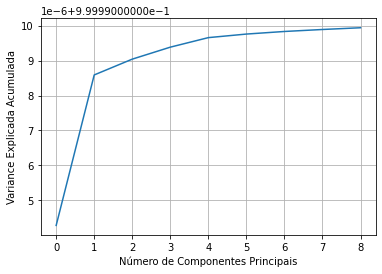

In [124]:


explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance = explained_variance_ratio.cumsum()
plt.plot(cumulative_variance)
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variance Explicada Acumulada')
plt.grid()
plt.show()

### Naive Bayes

In [125]:

X = X_pca
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# modelo Naive Bayes
naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_train, y_train)
y_pred = naive_bayes_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred))


Acurácia: 67.34%
               precision    recall  f1-score   support

Indeterminate       0.65      0.78      0.71       397
           No       0.71      0.57      0.63       258
          Yes       0.70      0.57      0.63       141

     accuracy                           0.67       796
    macro avg       0.69      0.64      0.66       796
 weighted avg       0.68      0.67      0.67       796



a alteração do random_state altera a accuracy porque(?)
estava com random_state=42

#### Numero de Componentes vs Accuracy

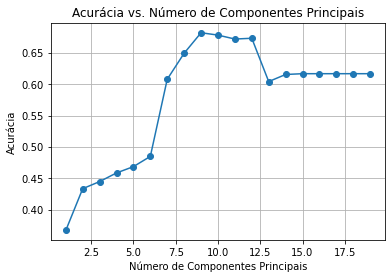

In [126]:

X_original = df.drop(['Target', 'Malignancy', 'Nodulo_id'], axis=1)


X = X_original.select_dtypes(include=['number'])

X = X.fillna(0)  
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# armazenar accuracies
accuracies = []

for n_components in range(1, 20):  
    pca = PCA(n_components=n_components)

    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    naive_bayes_model = GaussianNB()

    
    naive_bayes_model.fit(X_train_pca, y_train)

    y_pred = naive_bayes_model.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.plot(range(1, 20), accuracies, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Acurácia')
plt.title('Acurácia vs. Número de Componentes Principais')
plt.grid()
plt.show()
